# Build Neural Network Models Using Numpy

## Boston Home Price Forecasting Task

### Data Processing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import json

datafile = './housing.data'
data = np.fromfile(datafile, sep = ' ')
feature_names = ['CRIM', 'zn', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
                'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
ratio = 0.8

In [2]:
def load_data(data, feature_names, ratio):
    feature_num = len(feature_names)

    # reshape the data into [N, 14]
    data = data.reshape([data.shape[0] // feature_num, feature_num])

    # calculate the maximums, minimums, and averages for every column
    maximums = data.max(axis = 0)
    minimums = data.min(axis = 0)
    avgs = data.sum(axis = 0) / data.shape[0]

    print(data)
    # normalize the data into [0, 1]
    for i in range(feature_num):
        data[:, i] = (data[:, i] - minimums[i]) / (maximums[i] - minimums[i])

    # spilt the data into training data(80%) and testing data(20%)
    offset = int(data.shape[0] * ratio)
    train_data = data[: offset]
    test_data = data[offset : -1]

    return train_data, test_data, maximums, minimums, avgs

## Build Network

In [3]:
class Network:
    def __init__(self, num_of_weights):
        # generate w in random
        # set a fixed random seed so that the algorithm can get same results
        np.random.seed(0)
        self.w = np.random.randn(num_of_weights, 1)
        self.b = 0

    # Forward calculation
    def forward(self, x):
        z = np.dot(x, self.w) + self.b
        return z

    # Loss function
    def loss(self, z, y):
        error = z - y
        num_samples = error.shape[0]
        cost = error * error
        cost = np.sum(cost) / (2 * num_samples)
        return cost

    # Calculate gradients
    def gradient(self, x, y, z):
        gradient_w = (z - y) * x
        gradient_w = np.mean(gradient_w, axis = 0)
        gradient_w = gradient_w[:, np.newaxis]
        gradient_b = (z - y)
        gradient_b = np.mean(gradient_b)

        return gradient_w, gradient_b

    # Update w and b
    def update(self, gradient_w, gradient_b, eta = 0.01):
        self.w = self.w - gradient_w * eta
        self.b = self.b - gradient_b * eta

    # optimization algorithm
    def train(self, train_data, iter = 1000, eta = 0.01):
        x = train_data[:, : -1]
        y = train_data[:, -1 :]
        losses = []
        
        for i in range(iter):
            z = self.forward(x)
            gradient_w, gradient_b = self.gradient(x, y, z)
            self.update(gradient_w, gradient_b, eta)
            # Generate loss list for printing
            L = self.loss(z, y)
            losses.append(L)
            if i % 10 == 0:
                print('iteration: {}, loss = {}'.format(i, L))

        return losses

    def train_SGD(self, train_data, num_epochs, batch_size = 10, eta = 0.01):
        n = len(train_data)
        losses = []

        for epoch_id in range(num_epochs):
            # random arrange the training data in every epoch
            np.random.shuffle(train_data)
            # spilt the training data in batch size
            mini_batches = [train_data[k : k + batch_size] for k in range(0, n, batch_size)]
            for iter_id, mini_batch in enumerate(mini_batches):
                x = mini_batch[:, : -1]
                y = mini_batch[:, -1 :]
                z = self.forward(x)
                loss = self.loss(z, y)
                gradient_w, gradient_b = self.gradient(x, y, z)
                self.update(gradient_w, gradient_b, eta)
                losses.append(loss)

                print('Epoch: {:3d} / iter: {:3d}, loss = {:.4f}'.
                      format(epoch_id, iter_id, loss))

        return losses

## Main

In [4]:
train_data, test_data, max_values, min_values, avg_values = \
            load_data(data, feature_names, ratio)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 3.9690e+02 4.9800e+00 2.4000e+01]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 3.9690e+02 9.1400e+00 2.1600e+01]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 3.9283e+02 4.0300e+00 3.4700e+01]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 3.9690e+02 5.6400e+00 2.3900e+01]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 3.9345e+02 6.4800e+00 2.2000e+01]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 3.9690e+02 7.8800e+00 1.1900e+01]]


In [5]:
net = Network(13)
losses = net.train(train_data, iter = 1000, eta = 0.01)

plot_x = np.arange(iteration)
plot_y = np.array(losses)
plt.plot(plot_x, plot_y)
plt.show()

iteration: 0, loss = 4.283994147378152
iteration: 10, loss = 2.4018185216517804
iteration: 20, loss = 1.471690922409947
iteration: 30, loss = 1.0066545055667522
iteration: 40, loss = 0.7690836464038121
iteration: 50, loss = 0.6430083380516992
iteration: 60, loss = 0.5718184070885777
iteration: 70, loss = 0.5278679702639161
iteration: 80, loss = 0.4976447176272886
iteration: 90, loss = 0.4745336171406072
iteration: 100, loss = 0.4552861063831305
iteration: 110, loss = 0.438297275359278
iteration: 120, loss = 0.4227652106096489
iteration: 130, loss = 0.4082807679373227
iteration: 140, loss = 0.3946273633792292
iteration: 150, loss = 0.3816832392585768
iteration: 160, loss = 0.36937373253055905
iteration: 170, loss = 0.3576479426768978
iteration: 180, loss = 0.34646730689096794
iteration: 190, loss = 0.33579998719338827
iteration: 200, loss = 0.32561809530990504
iteration: 210, loss = 0.31589630404660946
iteration: 220, loss = 0.3066111369605542
iteration: 230, loss = 0.29774059068557784


NameError: name 'iteration' is not defined

Epoch:   0 / iter:   0, loss = 0.2109
Epoch:   0 / iter:   1, loss = 0.0446
Epoch:   0 / iter:   2, loss = 0.0531
Epoch:   0 / iter:   3, loss = 0.1006
Epoch:   0 / iter:   4, loss = 0.0379
Epoch:   0 / iter:   5, loss = 0.0222
Epoch:   0 / iter:   6, loss = 0.2090
Epoch:   0 / iter:   7, loss = 0.1898
Epoch:   0 / iter:   8, loss = 0.1090
Epoch:   0 / iter:   9, loss = 0.0197
Epoch:   0 / iter:  10, loss = 0.0460
Epoch:   0 / iter:  11, loss = 0.0527
Epoch:   0 / iter:  12, loss = 0.0289
Epoch:   0 / iter:  13, loss = 0.0851
Epoch:   0 / iter:  14, loss = 0.1216
Epoch:   0 / iter:  15, loss = 0.0748
Epoch:   0 / iter:  16, loss = 0.0441
Epoch:   0 / iter:  17, loss = 0.0713
Epoch:   0 / iter:  18, loss = 0.1199
Epoch:   0 / iter:  19, loss = 0.0571
Epoch:   0 / iter:  20, loss = 0.0660
Epoch:   0 / iter:  21, loss = 0.0782
Epoch:   0 / iter:  22, loss = 0.0829
Epoch:   0 / iter:  23, loss = 0.0701
Epoch:   0 / iter:  24, loss = 0.0593
Epoch:   0 / iter:  25, loss = 0.0425
Epoch:   0 /

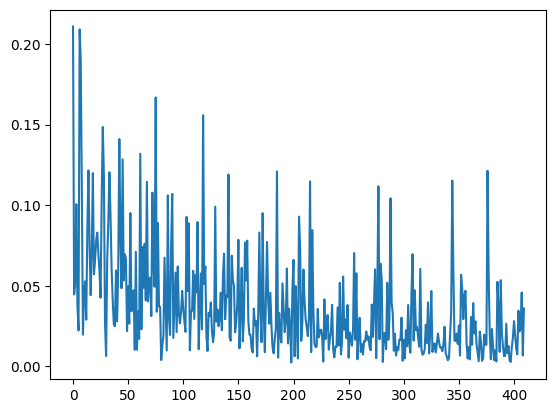

In [6]:
losses = net.train_SGD(train_data, num_epochs = 10, batch_size = 10, eta = 0.1)

plot_x = np.arange(len(losses))
plot_y = np.array(losses)
plt.plot(plot_x, plot_y)
plt.show()